In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv('ccdefault.csv', header=0)

In [82]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
df.shape

(30000, 25)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df.iloc[:,1:-2]
y = df.iloc[:,-1]

In [86]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1, random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier
import timeit

In [88]:
rf = RandomForestClassifier(n_estimators=50)
start = timeit.default_timer()

In [89]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
cross_pred_test=rf.predict(X_test)
cross_pred_train=rf.predict(X_train)
train_accuracy_cv = cross_val_score(rf,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf,X=X_test,y=y_test,cv=10,n_jobs=-1)

In [92]:
test_rs_cv = list(test_accuracy_cv)

train_rs_cv = list(train_accuracy_cv)
rs_cv = pd.DataFrame(np.array([train_rs_cv,test_rs_cv]),columns = ['1','2','3','4','5','6','7','8','9','10'])
rs_cv.rename(index={0:'Train',1:'Test'}, inplace=True)
rs_cv




,1,2,3,4,5,6,7,8,9,10
Train,0.813032,0.805257,0.823399,0.816296,0.823333,0.816667,0.821852,0.821045,0.806966,0.804742
Test,0.787375,0.800000,0.833333,0.806667,0.836667,0.800000,0.810000,0.843333,0.826667,0.806020


In [93]:
end = timeit.default_timer()
print('Time: ', end - start) 

Time:  8.497571351999966


In [94]:
from sklearn.ensemble import RandomForestClassifier
start1 = timeit.default_timer()
rf_60 = RandomForestClassifier(n_estimators=60)
rf_60.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_pred_test=rf_60.predict(X_test)
cross_pred_train=rf_60.predict(X_train)
train_accuracy_cv = cross_val_score(rf_60,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf_60,X=X_test,y=y_test,cv=10,n_jobs=-1)
test_rs_cv = list(test_accuracy_cv)

train_rs_cv = list(train_accuracy_cv)
rs_cv = pd.DataFrame(np.array([train_rs_cv,test_rs_cv]),columns = ['1','2','3','4','5','6','7','8','9','10'])
rs_cv.rename(index={0:'Train',1:'Test'}, inplace=True)
rs_cv


,1,2,3,4,5,6,7,8,9,10
Train,0.807108,0.805628,0.826731,0.818148,0.822222,0.809259,0.822593,0.820304,0.812523,0.809930
Test,0.787375,0.793333,0.820000,0.803333,0.843333,0.800000,0.810000,0.856667,0.813333,0.816054


In [95]:
end1 = timeit.default_timer()
print('Time: ', end1 - start1) 

Time:  9.401025442000048


In [96]:
from sklearn.ensemble import RandomForestClassifier
start2 = timeit.default_timer()
rf_100 = RandomForestClassifier(n_estimators=100)
rf_100.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
cross_pred_test=rf.predict(X_test)
cross_pred_train=rf.predict(X_train)
train_accuracy_cv = cross_val_score(rf_100,X=X_train,y=y_train,cv=10,n_jobs=-1)
test_accuracy_cv = cross_val_score(rf_100,X=X_test,y=y_test,cv=10,n_jobs=-1)
test_rs_cv = list(test_accuracy_cv)

train_rs_cv = list(train_accuracy_cv)
rs_cv = pd.DataFrame(np.array([train_rs_cv,test_rs_cv]),columns = ['1','2','3','4','5','6','7','8','9','10'])
rs_cv.rename(index={0:'Train',1:'Test'}, inplace=True)
rs_cv


,1,2,3,4,5,6,7,8,9,10
Train,0.807849,0.805998,0.827101,0.818148,0.818889,0.815185,0.822593,0.819933,0.813635,0.811412
Test,0.784053,0.803333,0.810000,0.806667,0.836667,0.806667,0.800000,0.860000,0.813333,0.829431


In [97]:
end2 = timeit.default_timer()
print('Time: ', end2 - start2) 

Time:  15.737279049999984


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [99]:
# param_grid = {
#                  'n_estimators': [50, 80, 85,100],
#              }
# rf1 = RandomForestClassifier()

In [100]:

# grid_rf = GridSearchCV(rf1, param_grid,cv = 10)
# grid_rf.fit(X_train, y_train)

In [101]:
# grid_rf.best_params_ 

## Importance

In [102]:
importances = rf_100.feature_importances_

Feature importance ranking:
1. feature 5 LIMIT_BAL (0.095806)
2. feature 4 SEX (0.070662)
3. feature 11 EDUCATION (0.064714)
4. feature 0 MARRIAGE (0.062396)
5. feature 12 AGE (0.058474)
6. feature 13 PAY_0 (0.054989)
7. feature 16 PAY_2 (0.054470)
8. feature 17 PAY_3 (0.054454)
9. feature 15 PAY_4 (0.054023)
10. feature 14 PAY_5 (0.053568)
11. feature 18 PAY_6 (0.049814)
12. feature 19 BILL_AMT1 (0.049389)
13. feature 21 BILL_AMT2 (0.046727)
14. feature 6 BILL_AMT3 (0.046616)
15. feature 20 BILL_AMT4 (0.045663)
16. feature 8 BILL_AMT5 (0.026153)
17. feature 7 BILL_AMT6 (0.024878)
18. feature 2 PAY_AMT1 (0.021421)
19. feature 10 PAY_AMT2 (0.019937)
20. feature 9 PAY_AMT3 (0.019407)
21. feature 3 PAY_AMT4 (0.014128)
22. feature 1 PAY_AMT5 (0.012311)


/Users/zhuoyuanzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  after removing the cwd from sys.path.


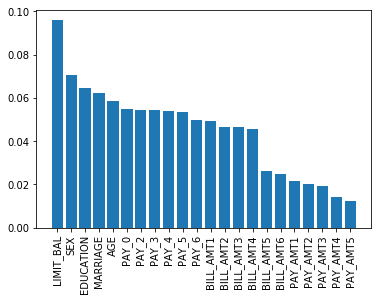

In [103]:

#std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = X_test.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:], importances[indices[:]])
plt.xticks(rotation=90)
plt.show()

In [104]:
print("My name is Zhuoyuan Zhang")
print("My NetID is: zz10")

print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhuoyuan Zhang
My NetID is: zz10
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
